# Лабораторная работа №1
# Готовый персептрон
## Выполнил Зимин Андрей

In [ ]:
import numpy as np
import copy
from matplotlib import pyplot as plt

# Задание в классе
## Задание 1.
Реализуйте определение ещё 4-х типов картинок: точка, горизонтальная линия,
вертикальная линия, квадрат.


In [ ]:

X = np.array([list(map(int, list(i))) for i in [
   '1001', # наклонная линия
   '0110', # наклонная линия
   '1111', # квадрат
   '1000', # точка
   '0100', # точка
   '0010', # точка
   '0001', # точка
   '0101', # вертикальная прямая
   '1010', # вертикальная прямая
   '1100', # горизонтальная прямая
   '0011', # горизонтальная прямая
   '0111',
   '0000',
  ]])

def perceptron(x):
  w = np.array([
      [ 1, 1, 1,  1,  1],
      [-1, 1, 1, -1,  1],
      [-1, 1, 1,  1, -1],
      [ 1, 1, 1, -1, -1],
  ])
  dot = np.dot(x, w)
  activation = [
      lambda s: abs(s)==2,
      lambda s: s==4,
      lambda s: s==1,
      lambda s: abs(s)==2,
      lambda s: abs(s)==2,
  ]
  res = [0]*len(dot)
  for i in range(len(dot)):
    res[i] = activation[i](dot[i])
  return res

print("Наклонная, квадрат, точка, вертикаль, горизонталь")
for i in range(X.shape[0]):
  ans = perceptron(X[i, :])
  print(ans)

Наклонная, квадрат, точка, вертикаль, горизонталь
[True, False, False, False, False]
[True, False, False, False, False]
[False, True, False, False, False]
[False, False, True, False, False]
[False, False, True, False, False]
[False, False, True, False, False]
[False, False, True, False, False]
[False, False, False, True, False]
[False, False, False, True, False]
[False, False, False, False, True]
[False, False, False, False, True]
[False, False, False, False, False]
[False, False, False, False, False]


## Задание 2.
Организуйте метод, который по готовому шаблону возвращает название (класс)
рисунка на нашей доске 2×2 (точка, горизонтальная линия, вертикальная линия,
наклонная линия, квадрат) или слово «другое». Обратите внимание, что персептону
поручать такую задачу нельзя. Он возвращает или 0 или 1

In [ ]:
def net(x):
  ans = perceptron(x)
  predict = ["Наклонная", "Квадрат", "Точка", "Вертикаль", "Горизонталь"]
  if sum(ans) != 1:
    return "Другое"
  return predict[ans.index(True)]

for i in range(X.shape[0]):
  ans = net(X[i, :])
  print(ans)

Наклонная
Наклонная
Квадрат
Точка
Точка
Точка
Точка
Вертикаль
Вертикаль
Горизонталь
Горизонталь
Другое
Другое


# Задание дома
## Задание 1
Реализовать с использованием персептрона распознавание 10 правильно нарисованных цифр в шаблоне одного знакоместа почтового индекса (9 сенсоров по числу фрагментов цифр)

In [ ]:
import pandas as pd
import math

Загрузка датасета

In [ ]:
df = pd.read_csv('data.csv')
y = df.y.to_numpy()
X = df.drop(columns=["y"]).to_numpy()
X

array([[1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 1]])

In [ ]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Функция вывода цифр

In [ ]:
def plot_nums(X, y_true=None, y_pred=None):
  fig, ax = plt.subplots(1, X.shape[0], figsize=(2*X.shape[0],4))
  plt.setp(ax, xticklabels=[], yticklabels=[])

  line = 'b'
  lw = 4

  for i in range(X.shape[0]):
    title = ""
    if y_true is not None:
      title += f"Цифра: {y_true[i]}\n"
    if y_pred is not None:
      title += f"Определено: {int(y_pred[i])}"
    x = X[i, :]
    ax[i].axis("off")
    ax[i].plot([0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 1, 2, 2, 1, 0, 1, 1, 2], 'k-.', lw=2, alpha=0.5)
    ax[i].title.set_text(title)
    if x[0]:
      ax[i].plot([0, 1], [2, 2], line, lw=lw)
    if x[1]:
      ax[i].plot([1, 1], [2, 1], line, lw=lw)
    if x[2]:
      ax[i].plot([1, 1], [1, 0], line, lw=lw)
    if x[3]:
      ax[i].plot([1, 0], [0, 0], line, lw=lw)
    if x[4]:
      ax[i].plot([0, 0], [0, 1], line, lw=lw)
    if x[5]:
      ax[i].plot([0, 0], [1, 2], line, lw=lw)
    if x[6]:
      ax[i].plot([0, 1], [1, 1], line, lw=lw)
    if x[7]:
      ax[i].plot([0, 1], [1, 2], line, lw=lw)
    if x[8]:
      ax[i].plot([0, 1], [0, 1], line, lw=lw)

Перцептрон

In [ ]:
class Perceptron:
  def __init__(self, sensors, hidden_layers, start_weights, activations):
    self.layers = []
    l = [sensors] + hidden_layers + [1]
    for i in range(len(hidden_layers)+1):
      self.layers.append(Layer(l[i], l[i+1], start_weights[i], activations[i], i))


  def predict(self, X, show_calc=False):
    result = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
      x = X[i, :]
      for layer in self.layers:
        x = np.append(x, values=[1]) # bias
        x = layer.forward(x, show_calc)
      result[i] = x[0]
      if show_calc:
        print()
    return result

class Layer:
  def __init__(self, sensors, size, start_weights, activation, index):
    self.sensors = sensors
    self.size = size
    self.w = start_weights
    self.a = activation
    self.i = index

  def forward(self, x, show_calc):
    m = np.dot(x, self.w)
    result = np.array([self.a(m[n]) for n in range(self.size)])

    if show_calc:
      print(f"Слой №{self.i+1}")
      print(f"Сенсоры  : {x}")
      print(f"Сумматор : {m}")
      print(f"Активация: {result}")

    return result

Определяем веса

In [ ]:
No = lambda x: x
Step = lambda x: int(x >= 6)
w1 = np.array([[1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
              [ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1],
              [ 1,  1, -1, -1,  1,  1,  1, -1,  1, -1],
              [ 1, -1,  1, -1, -1,  1,  1, -1,  1, -1],
              [ 1, -1, -1, -1, -1, -1,  1,  1,  1, -1],
              [ 1, -1, -1, -1,  1,  1, -1, -1,  1,  1],
              [-2, -1, -1,  1,  1,  1,  1, -1,  2,  1],
              [-1,  1, -1,  1, -1, -1,  1,  1, -1, -1],
              [-1, -1,  1,  1, -1, -1, -1, -1, -1,  1],
              [ 1,  4,  3,  3,  3,  2,  2,  4, -1,  2],])
w2 = np.array([[1],
               [2],
               [3],
               [4],
               [5],
               [6],
               [7],
               [8],
               [9],
               [10],
               [-1],])
p = Perceptron(10, [10], [w1, w2], [Step, No])
p

Получаем предсказания

Слой №1
Сенсоры  : [1 1 1 1 1 1 0 0 0 1]
Сумматор : [ 7  2  3 -1  3  4  2  2  5  2]
Активация: [1 0 0 0 0 0 0 0 0 0]
Слой №2
Сенсоры  : [1 0 0 0 0 0 0 0 0 0 1]
Сумматор : [0]
Активация: [0]

Слой №1
Сенсоры  : [0 1 1 0 0 0 0 1 0 1]
Сумматор : [2 7 2 2 4 1 3 3 0 1]
Активация: [0 1 0 0 0 0 0 0 0 0]
Слой №2
Сенсоры  : [0 1 0 0 0 0 0 0 0 0 1]
Сумматор : [1]
Активация: [1]

Слой №1
Сенсоры  : [1 1 0 1 0 0 0 0 1 1]
Сумматор : [3 2 7 3 1 2 0 2 1 4]
Активация: [0 0 1 0 0 0 0 0 0 0]
Слой №2
Сенсоры  : [0 0 1 0 0 0 0 0 0 0 1]
Сумматор : [2]
Активация: [2]

Слой №1
Сенсоры  : [1 0 0 0 0 0 1 1 1 1]
Сумматор : [-2  2  3  7  1  2  2  4  0  4]
Активация: [0 0 0 1 0 0 0 0 0 0]
Слой №2
Сенсоры  : [0 0 0 1 0 0 0 0 0 0 1]
Сумматор : [3]
Активация: [3]

Слой №1
Сенсоры  : [0 1 1 0 0 1 1 0 0 1]
Сумматор : [2 4 1 1 7 4 2 0 4 4]
Активация: [0 0 0 0 1 0 0 0 0 0]
Слой №2
Сенсоры  : [0 0 0 0 1 0 0 0 0 0 1]
Сумматор : [4]
Активация: [4]

Слой №1
Сенсоры  : [1 0 1 1 0 1 1 0 0 1]
Сумматор : [3 1 2 2 4 7 3 1 5 3]
А

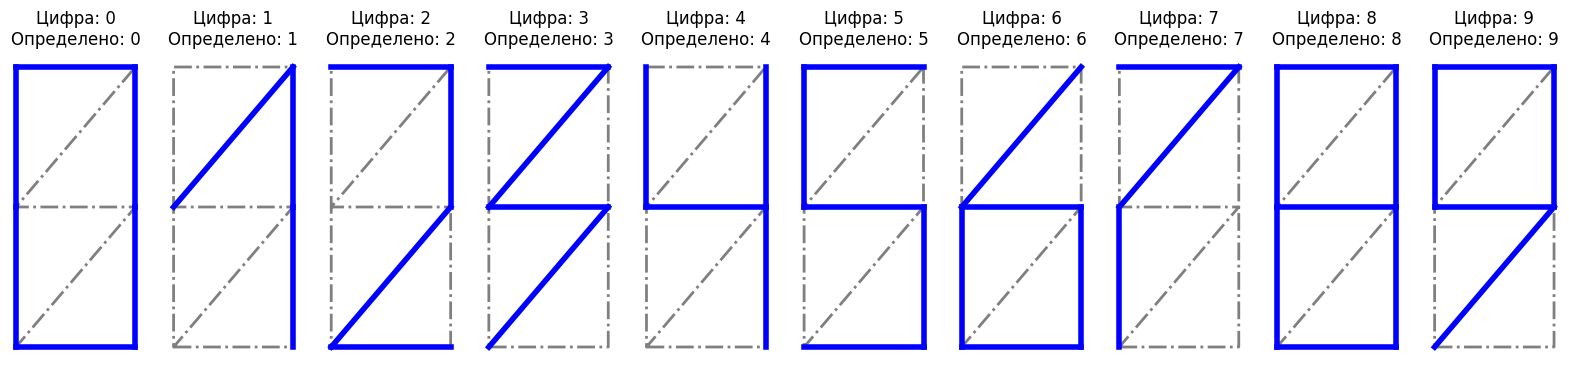

In [ ]:
y_pred = p.predict(X, show_calc=True)
plot_nums(X, y, y_pred)

## Задание 2
Проверить работу программы на корректных и некорректных вариантах.

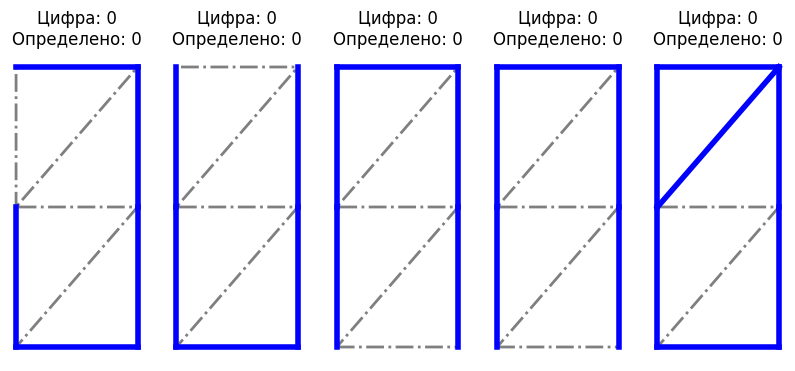

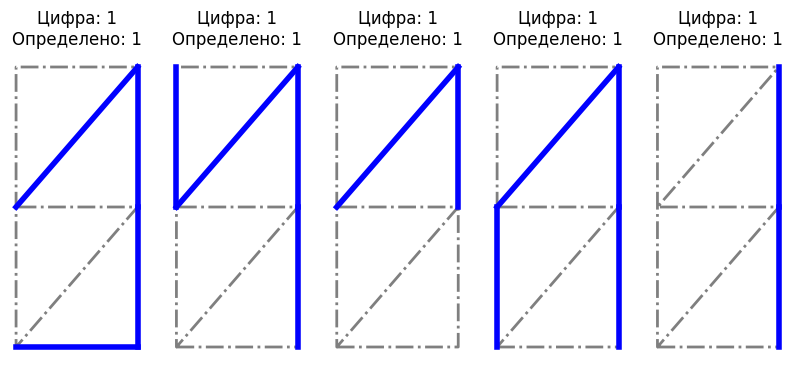

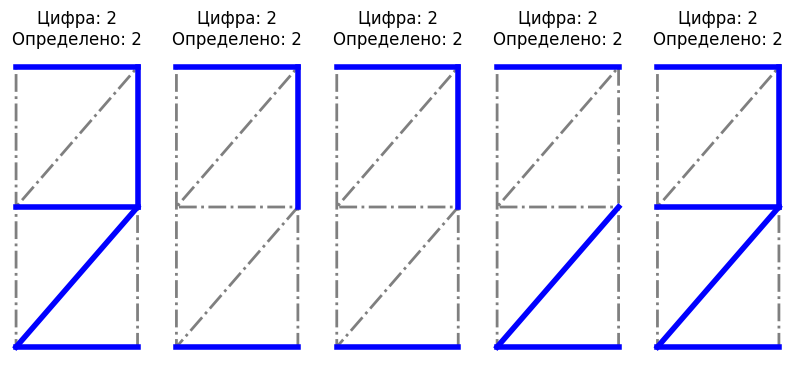

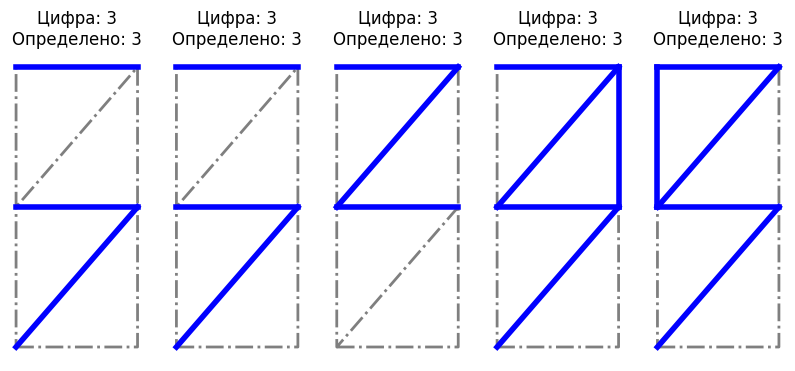

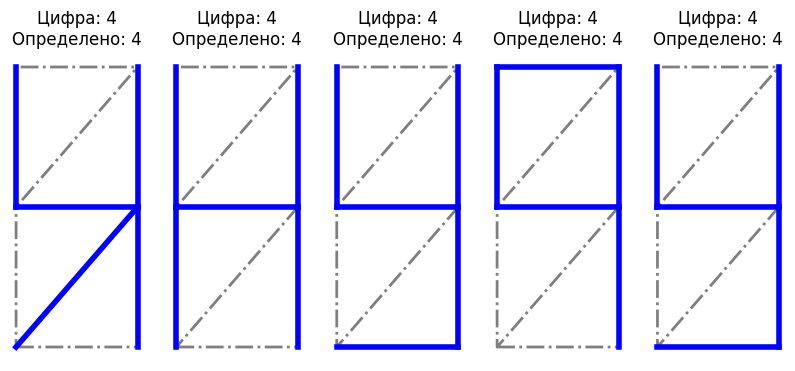

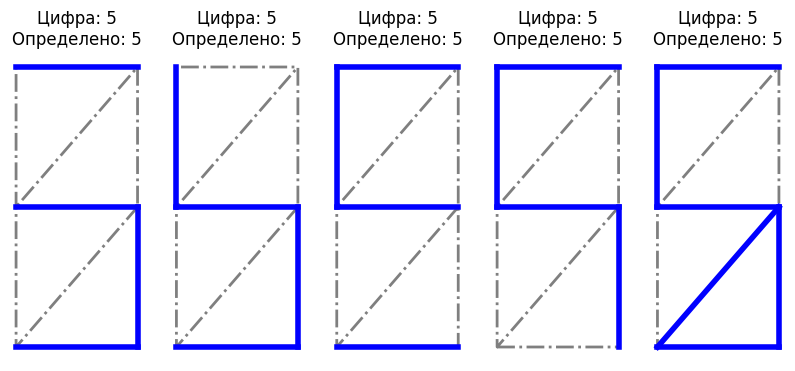

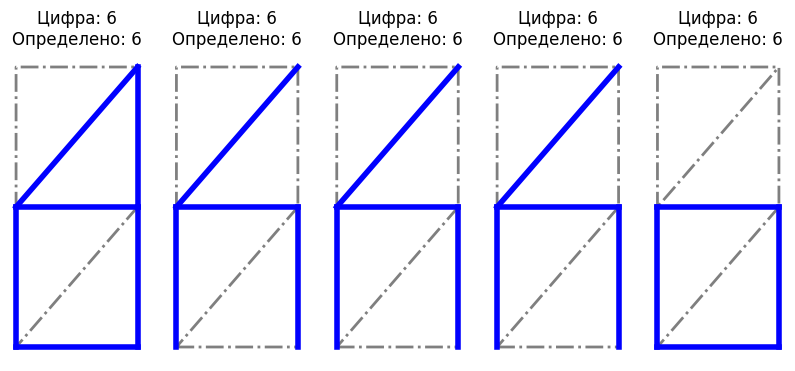

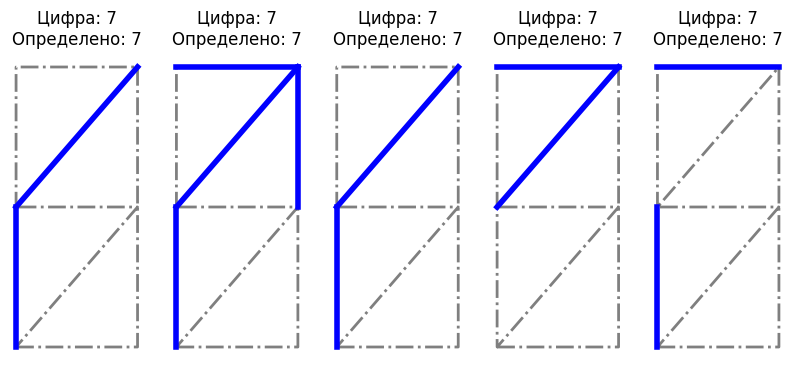

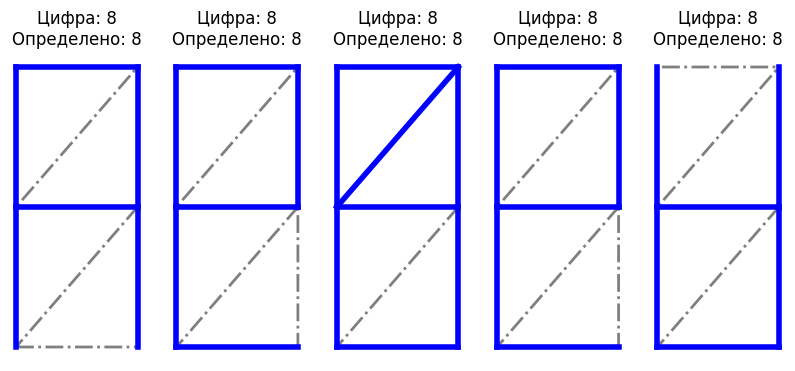

In [ ]:
np.random.seed(0)
# Создание вариантов с одной ошибкой
for i in range(9):
  size = 5
  # По 5 штук для каждой цифры
  one_miss = []
  y_one_miss = np.ones(size, dtype=int)*i
  for j in range(size):
    x = X[i, :].copy()
    # Заменяем один сенсор
    k = np.random.randint(0, 9)
    x[k] = int(not x[k])
    one_miss.append(x)
  one_miss = np.array(one_miss)
  y_pred = p.predict(one_miss, show_calc=False)
  plot_nums(one_miss, y_one_miss, y_pred)

Как мы видим, если в примерах допущено по одной ошибке:
- пропущена одна черта,
- присутствует одна лишняя черта,  

Цифра определяется правильно

Проверим перцептрон на вариантах с двумя ошибками

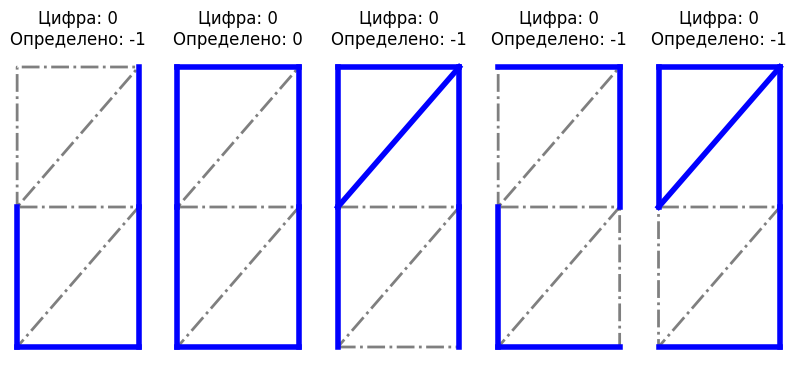

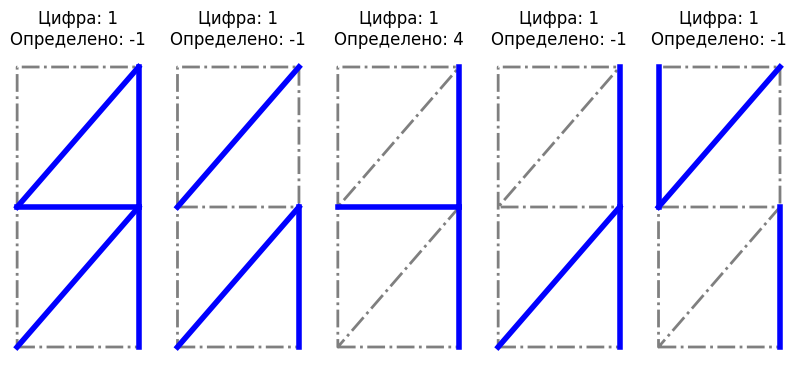

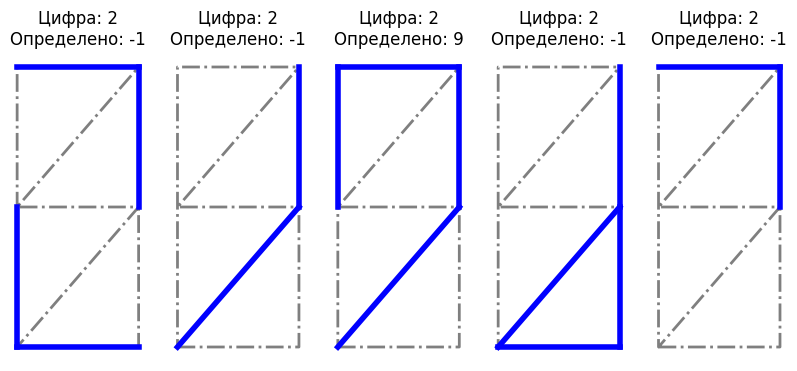

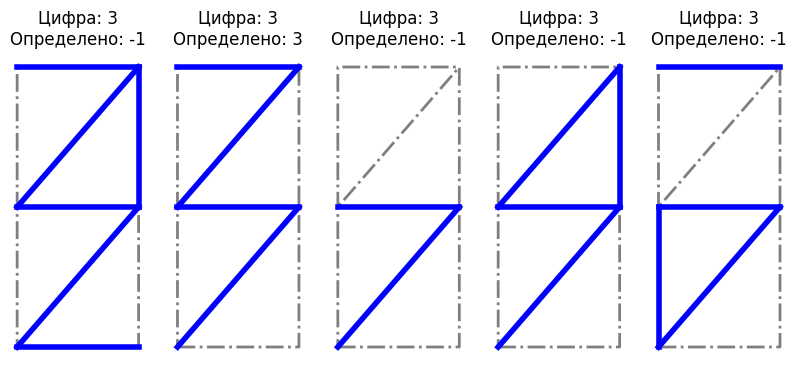

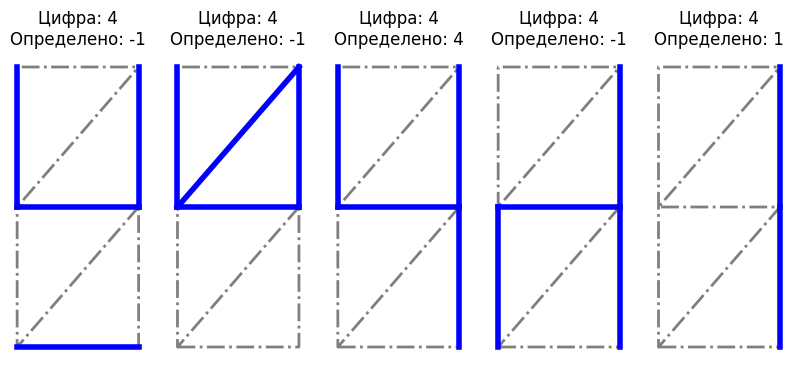

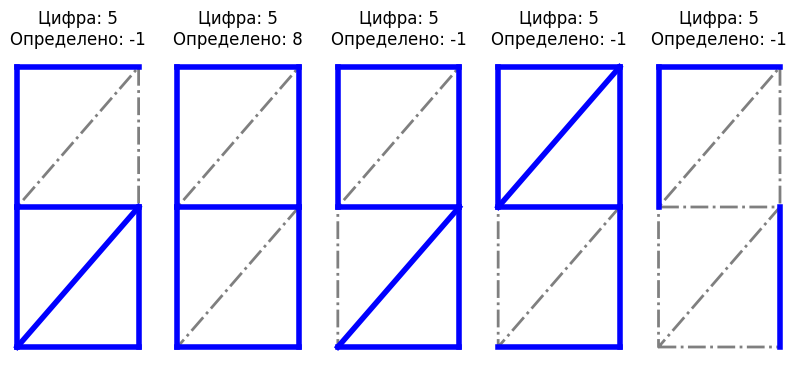

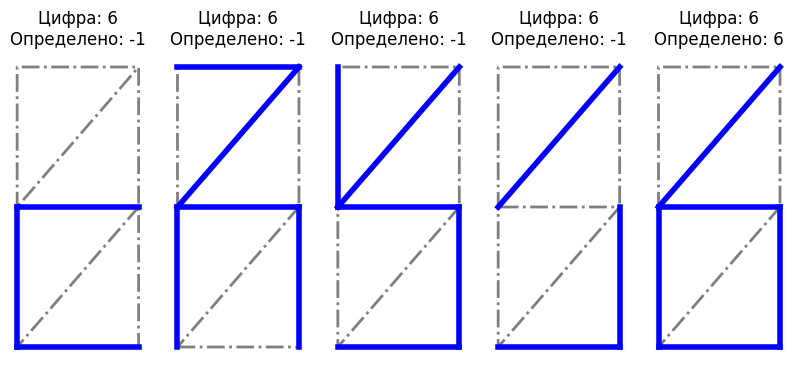

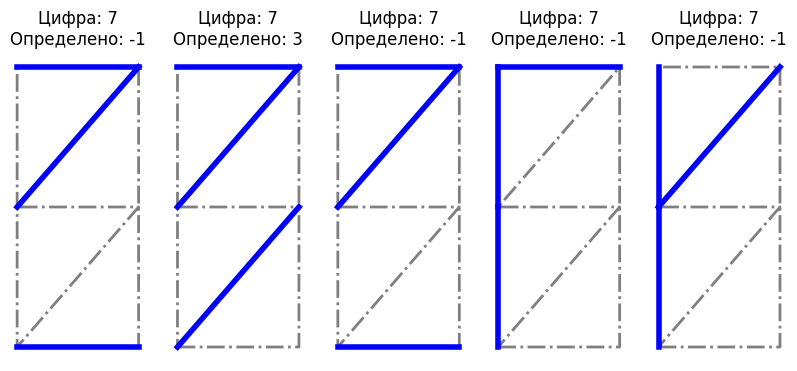

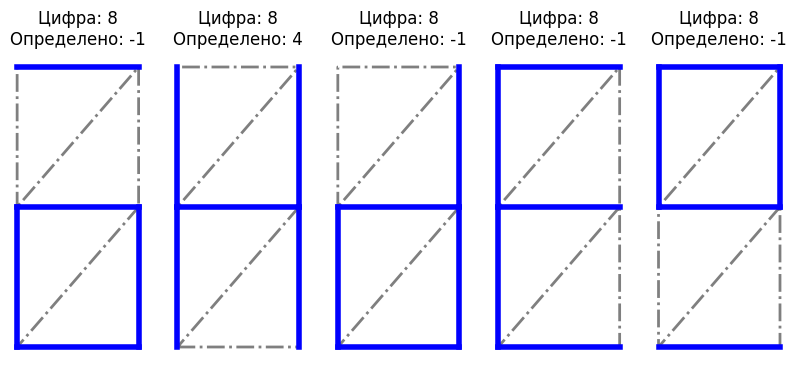

In [ ]:
np.random.seed(0)
# Создание вариантов с двумя ошибками
for i in range(9):
  size = 5
  # По 5 штук для каждой цифры
  one_miss = []
  y_one_miss = np.ones(size, dtype=int)*i
  for j in range(size):
    x = X[i, :].copy()
    # Заменяем один сенсор
    k = np.random.randint(0, 9)
    x[k] = int(not x[k])
    k = np.random.randint(0, 9)
    x[k] = int(not x[k])
    one_miss.append(x)
  one_miss = np.array(one_miss)
  y_pred = p.predict(one_miss, show_calc=False)
  plot_nums(one_miss, y_one_miss, y_pred)

Видно, что на некорректных примерах (где и человеку нельзя однозначно определить цифру), чаще всего получаем ответ -1. Однако, в некоторых примерах получилось, что когда мы допустили 2 ошибки, то вернулись к исходной цифре, или же получили фигуру, больше похожую на другую цифру. Перцептрон корректно обработал эти некорректные примеры.

## Задание 3
Предложить вариант оптимизации числа сенсоров

Как уменьшить число сенсоров:
1. Если мы можем изменять входные данные, то можно кодировать информацию в двоичном коде. Тогда для 10 цифр потребуется 4 сенсора, так мы можем закодировать 16 различных значений.
2. Если входные данные менять нельзя, то можно убрать один из сенсоров. Убираем тот, который несёт меньше всего информации: нужно выбрать такой сенсор, где больше всего одинаковых значений. Если таких несколько, то любой из них. После этого точность распознавания снизится, но перцептрон будет работать быстрее. Если требуется ещё уменьшить число сенсоров, то снова находим тот, который несёт меньше всего информации и убираем его.